In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS


<AxesSubplot:>

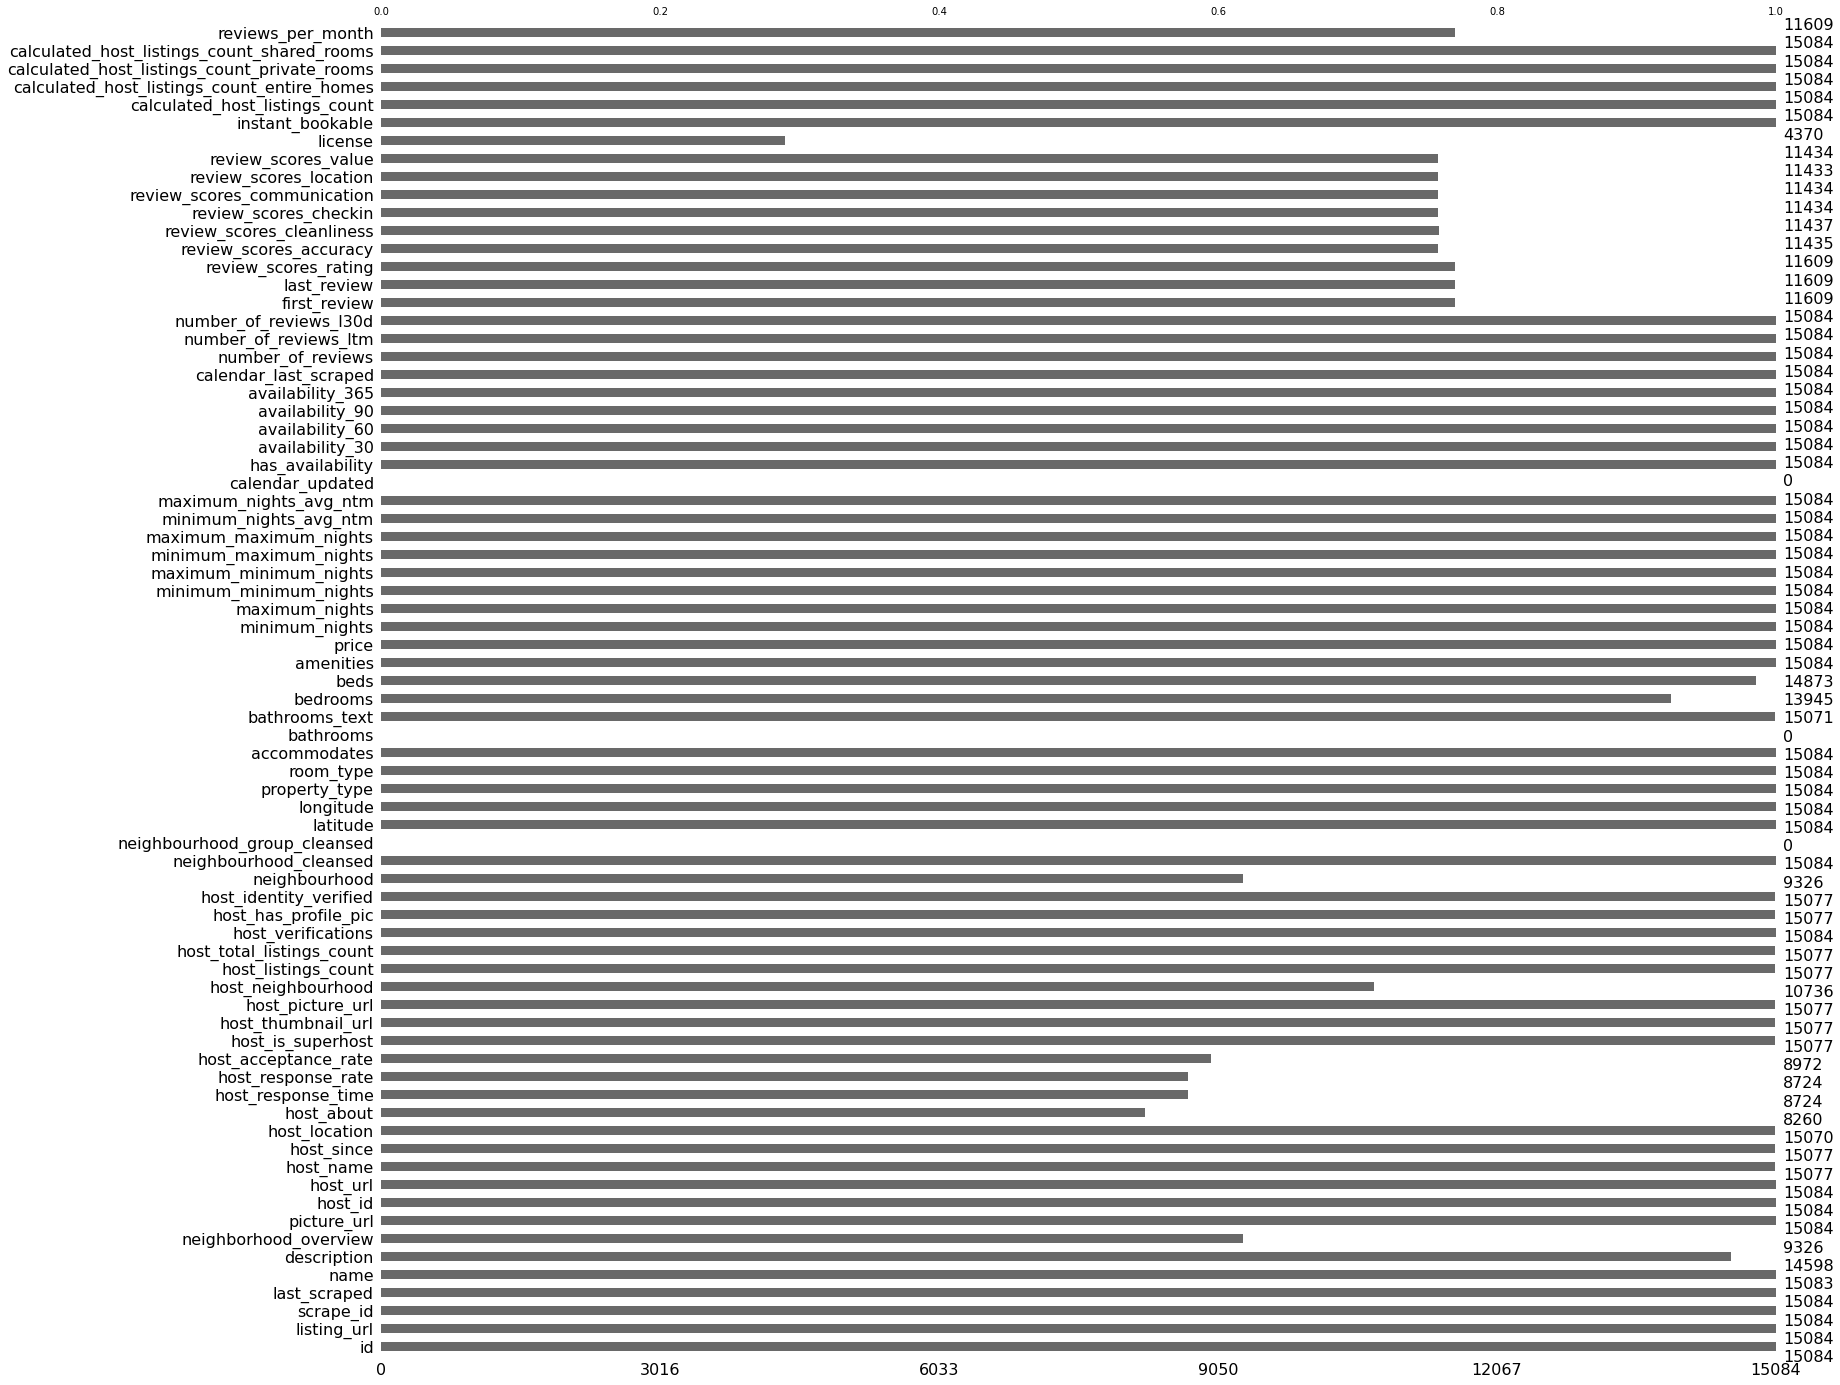

In [4]:
# Data preprossesing
df_raw = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')

# Fix "$200"
df_raw['price'] = df_raw['price'].str.replace(',', '')
df_raw['price'] = df_raw['price'].str.replace('$', '')
df_raw['price'] = df_raw['price'].astype(float)

df_calendar['price'] = df_calendar['price'].str.replace(',', '')
df_calendar['price'] = df_calendar['price'].str.replace('$', '')
df_calendar['price'] = df_calendar['price'].astype(float)
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
msno.bar(df_raw) # check NAs


In [23]:
temp_l = ["name","accommodates","description","host_name","neighbourhood_cleansed","latitude","longitude","room_type","price"
,"number_of_reviews","reviews_per_month"]

df_listings = df_raw[temp_l]

# How does price change during the year?

Text(0.5, 1.0, 'Airbnb Toronto Monthly Average Listing Price From Dec 05, 2020 to Dec 05, 2021')

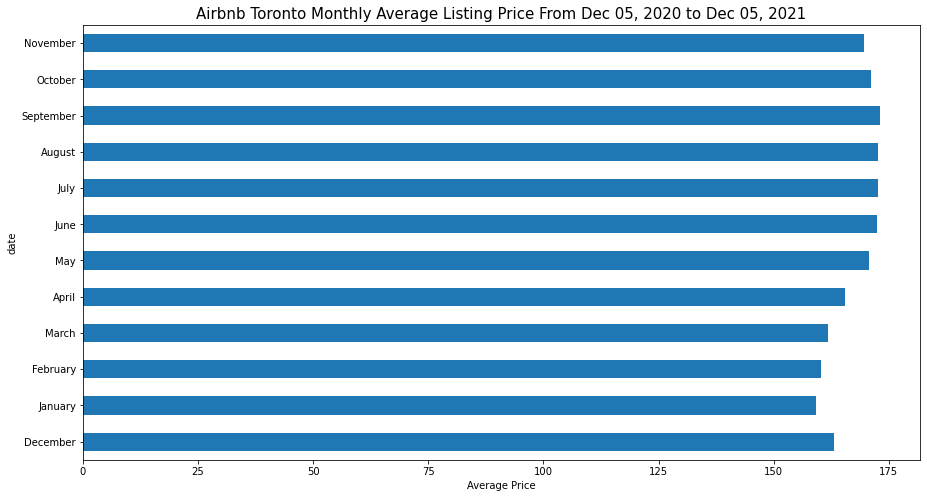

In [6]:
# monthly average price
monthly_avg = df_calendar.groupby(df_calendar['date'].dt.strftime('%B'),sort=False)['price'].mean()
monthly_avg.plot(kind = 'barh' , figsize = (15,8))
plt.xlabel('Average Price')
plt.title("Airbnb Toronto Monthly Average Listing Price From Dec 05, 2020 to Dec 05, 2021", size = 15)

# During what period of time is busy/off season?

Text(0.5, 0, 'Date')

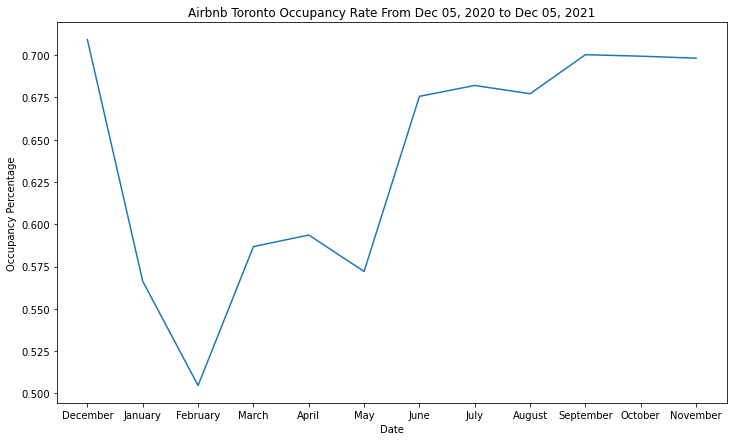

In [7]:
# listings vs date
df_busy = df_calendar[['date', 'available']]
df_busy['available'] = df_calendar.available.map( lambda i: 0 if i == 't' else 1)  # available = 0, not available = 1
df_busy = df_busy.groupby(df_calendar['date'].dt.strftime('%B'),sort=False)['available'].mean().reset_index()
plt.figure(figsize=(12, 7))
plt.plot(df_busy['date'], df_busy['available'])
plt.title('Airbnb Toronto Occupancy Rate From Dec 05, 2020 to Dec 05, 2021')
plt.ylabel('Occupancy Percentage')
plt.xlabel('Date')

# Price vs Days of Week

<Figure size 1440x648 with 0 Axes>

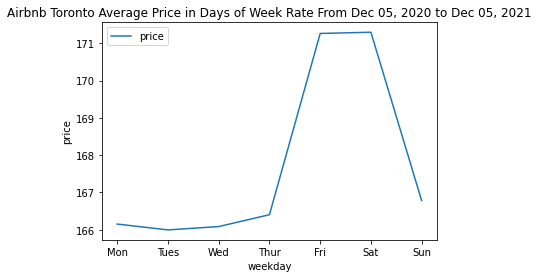

<Figure size 1440x648 with 0 Axes>

In [40]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['weekday'] = df_calendar.date.dt.day_name()
df_week=df_calendar[['weekday','price']]
df_week = df_week.groupby(['weekday']).mean().reindex([ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_week.plot()
plt.ylabel('price')
plt.title('Airbnb Toronto Average Price in Days of Week Rate From Dec 05, 2020 to Dec 05, 2021')
plt.xticks(list(range(0, 7, 1)), "Mon Tues Wed Thur Fri Sat Sun".split());
plt.figure(figsize=(12, 9))


# The neightbourhood with highest listings:

In [49]:
df_listings['neighbourhood_cleansed'].unique()

array(['Little Portugal', 'Waterfront Communities-The Island',
       'Briar Hill-Belgravia', 'Greenwood-Coxwell', 'Mount Pleasant West',
       'South Parkdale', 'The Beaches', 'Oakridge', 'Wexford/Maryvale',
       'Church-Yonge Corridor', 'Rosedale-Moore Park',
       'Bay Street Corridor', 'South Riverdale', 'Niagara',
       'Dufferin Grove', 'High Park North', 'Danforth East York',
       'High Park-Swansea', 'Agincourt South-Malvern West',
       'Humewood-Cedarvale', 'Junction Area', 'Lawrence Park North',
       'North St.James Town', 'Annex', 'Caledonia-Fairbank',
       'Roncesvalles', 'Yonge-St.Clair', 'Leaside-Bennington',
       'Blake-Jones', 'Dovercourt-Wallace Emerson-Junction',
       'Willowdale East', 'Danforth', 'Kensington-Chinatown', 'Moss Park',
       'Palmerston-Little Italy', 'University', 'Flemingdon Park',
       'East End-Danforth', 'Woodbine Corridor', 'Brookhaven-Amesbury',
       'Oakwood Village', 'Trinity-Bellwoods', 'Broadview North',
       'Weston-

Text(0.5, 0, 'neighbourhood')

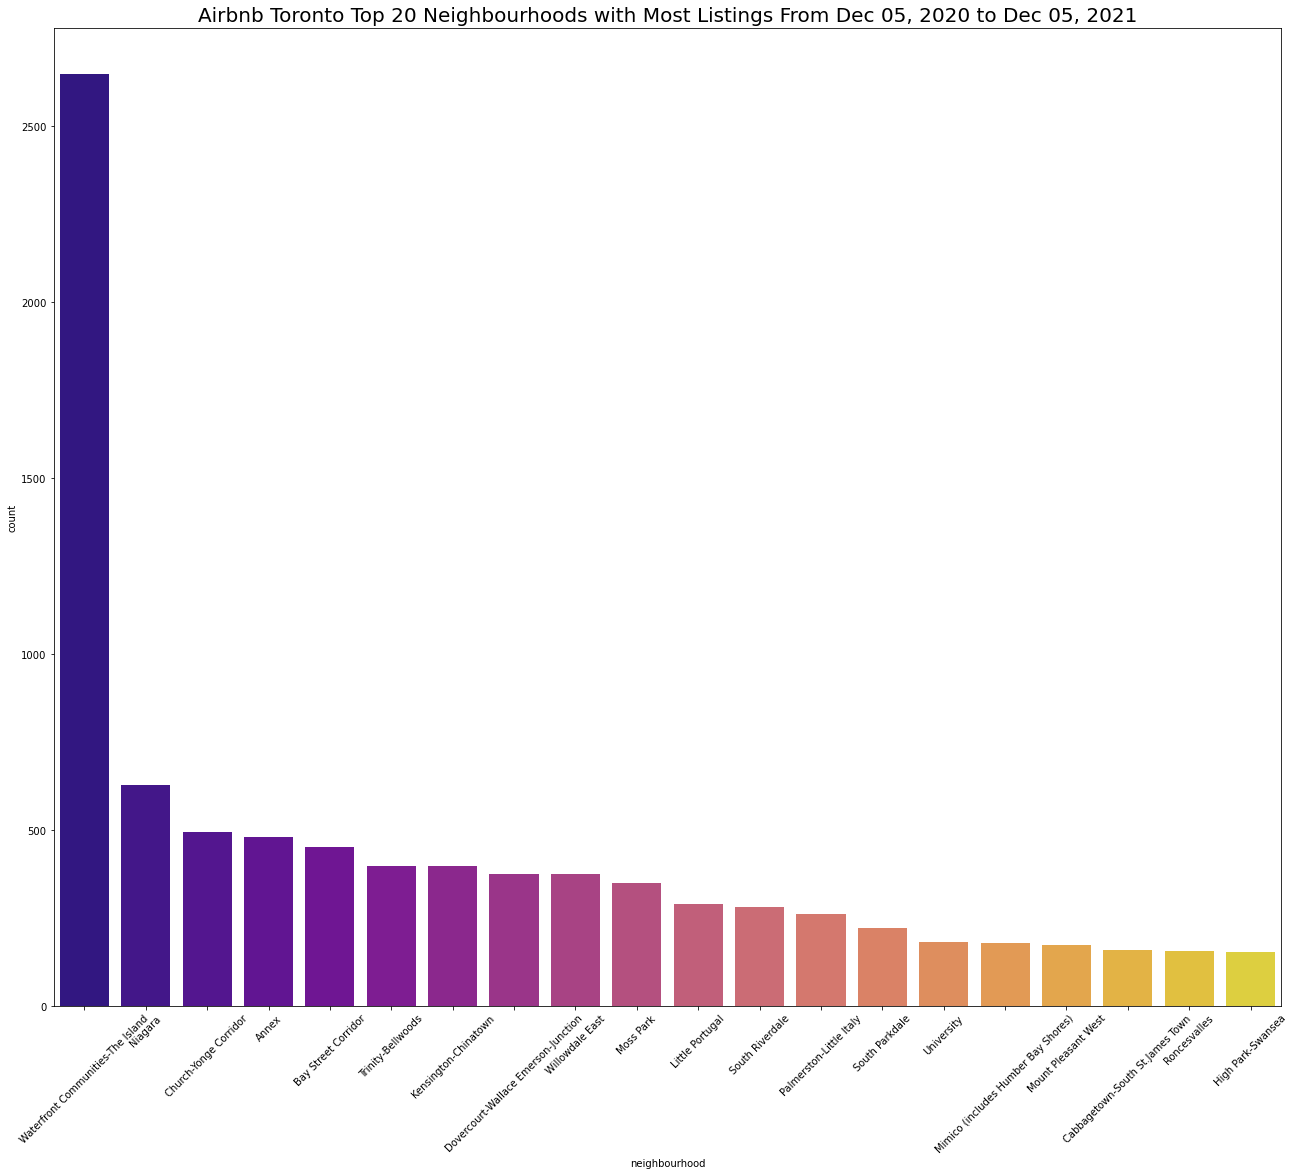

In [47]:
plt.figure(figsize=(22,18))
plt.xticks(rotation=45)
sns.countplot(df_listings['neighbourhood_cleansed'], palette="plasma",
              order=df_listings.neighbourhood_cleansed.value_counts().iloc[:20].index)
plt.title('Airbnb Toronto Top 20 Neighbourhoods with Most Listings From Dec 05, 2020 to Dec 05, 2021',size = 20)
plt.xlabel('neighbourhood')

# Different types of rooms:

Text(0.5, 0, 'Room Type')

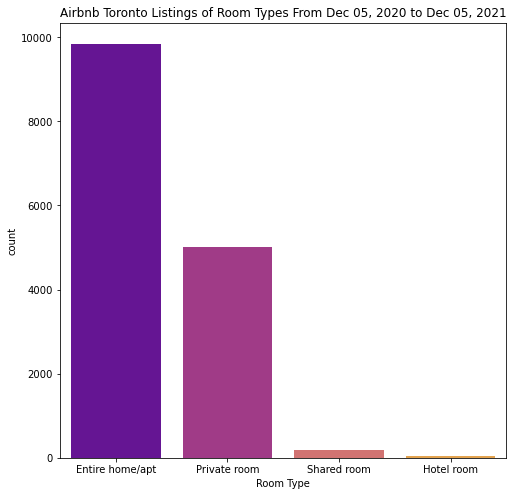

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(df_listings['room_type'], palette="plasma")
plt.title('Airbnb Toronto Listings of Room Types From Dec 05, 2020 to Dec 05, 2021')
plt.xlabel('Room Type')

Text(0.5, 0, 'Room Type')

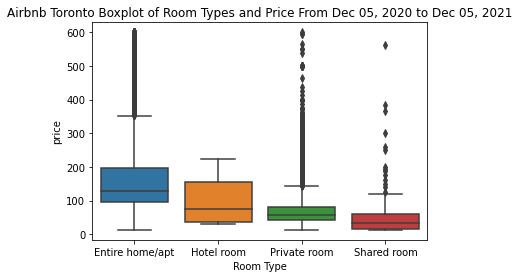

In [50]:
sort_price = df_listings.groupby('room_type')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='room_type', data=df_listings.loc[(df_listings.price <= 600) & (df_listings.price > 0)], order=sort_price)
plt.title('Airbnb Toronto Boxplot of Room Types and Price From Dec 05, 2020 to Dec 05, 2021')
plt.xlabel('Room Type')

# Number of guests

Text(0.5, 0, 'Number of Guests')

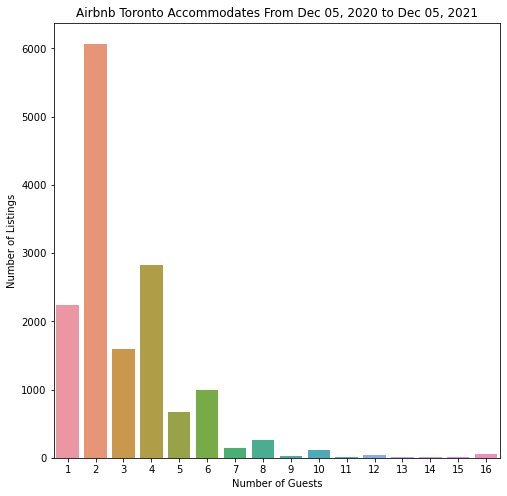

In [12]:
df_listings = df_listings[df_listings['accommodates'] != 0]
df_acc = df_listings['accommodates'].value_counts().sort_index()
df_acc = pd.DataFrame(df_acc)
plt.figure(figsize=(8,8))
sns.barplot(x=df_acc.index, y="accommodates", data=df_acc)
plt.title('Airbnb Toronto Accommodates From Dec 05, 2020 to Dec 05, 2021')
plt.ylabel('Number of Listings')
plt.xlabel('Number of Guests')

In [51]:
df_reviews = df_listings.dropna(subset=["reviews_per_month"])
df_reviews_top = df_reviews.sort_values(by='reviews_per_month').iloc[-500:]

In [52]:
len(df_reviews)

11609

Text(0.5, 0, 'Number of Guests')

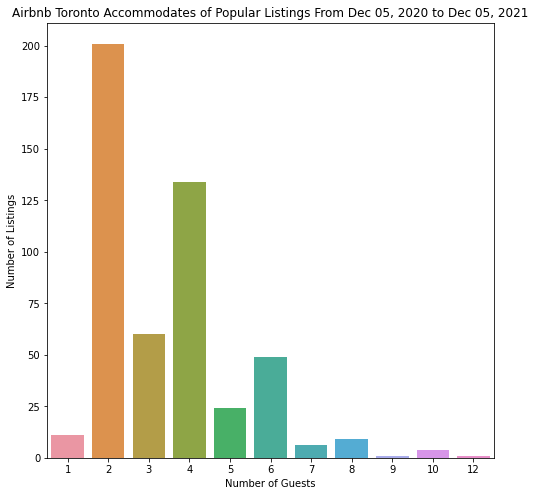

In [53]:
df_acc = df_reviews_top[df_reviews_top['accommodates'] != 0]
df_acc = df_acc['accommodates'].value_counts().sort_index()
df_acc = pd.DataFrame(df_acc)
plt.figure(figsize=(8,8))
sns.barplot(x=df_acc.index, y="accommodates", data=df_acc)
plt.title('Airbnb Toronto Accommodates of Popular Listings From Dec 05, 2020 to Dec 05, 2021')
plt.ylabel('Number of Listings')
plt.xlabel('Number of Guests')

# Map of Neighbourhoods

In [26]:
top_neighbour = list(df_listings.neighbourhood_cleansed.value_counts().iloc[:20].index)
df_top = df_listings[df_listings["neighbourhood_cleansed"].isin(top_neighbour)]

In [27]:
round(len(df_top)/len(df_listings),2)*100

56.99999999999999

In [54]:
len(df_listings["neighbourhood_cleansed"].unique())

140

Text(0, 0.5, 'Listings')

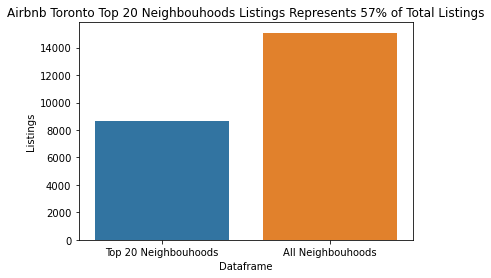

In [28]:
# Top 20 neighbouhoods listings is around 57 percent of the listings
df_len = pd.DataFrame()
df_len["Total listings"] = [len(df_top),len(df_listings)]
df_len["Dataframe"] = ["Top 20 Neighbouhoods", "All Neighbouhoods"]

q1_barplot = sns.barplot(x="Dataframe", 
                         y="Total listings", 
                         data=df_len)
plt.title("Airbnb Toronto Top 20 Neighbourhoods Listings Represents 57% of Total Listings")
plt.ylabel("Listings")

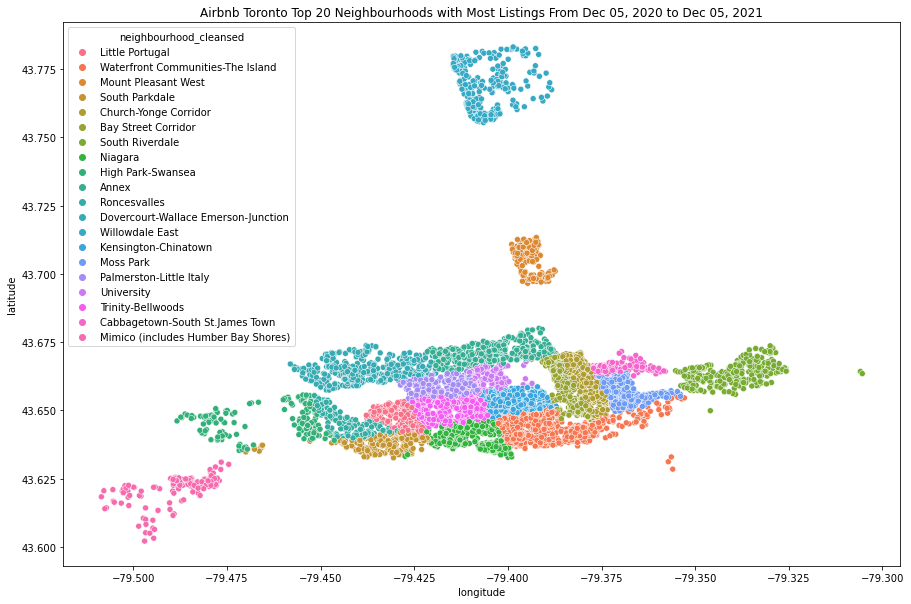

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(df_top.longitude,df_top.latitude,hue=df_top.neighbourhood_cleansed)
plt.title('Airbnb Toronto Top 20 Neighbourhoods with Most Listings From Dec 05, 2020 to Dec 05, 2021')
plt.ioff()

# WordCloud of Name and Describtion of popular listings

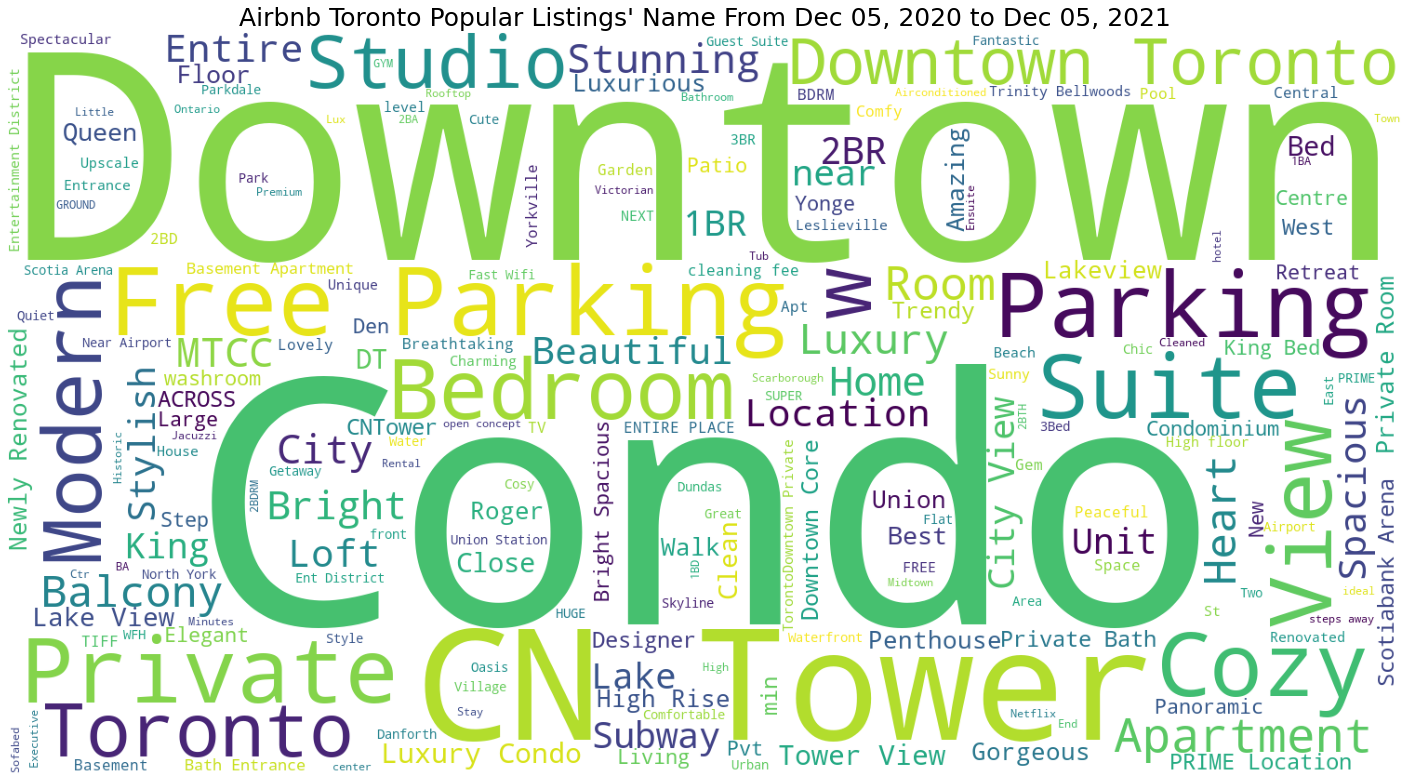

In [61]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1500,
                          height=800
                         ).generate(" ".join(df_reviews_top.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Airbnb Toronto Popular Listings' Name From Dec 05, 2020 to Dec 05, 2021",size = 25)
plt.show()

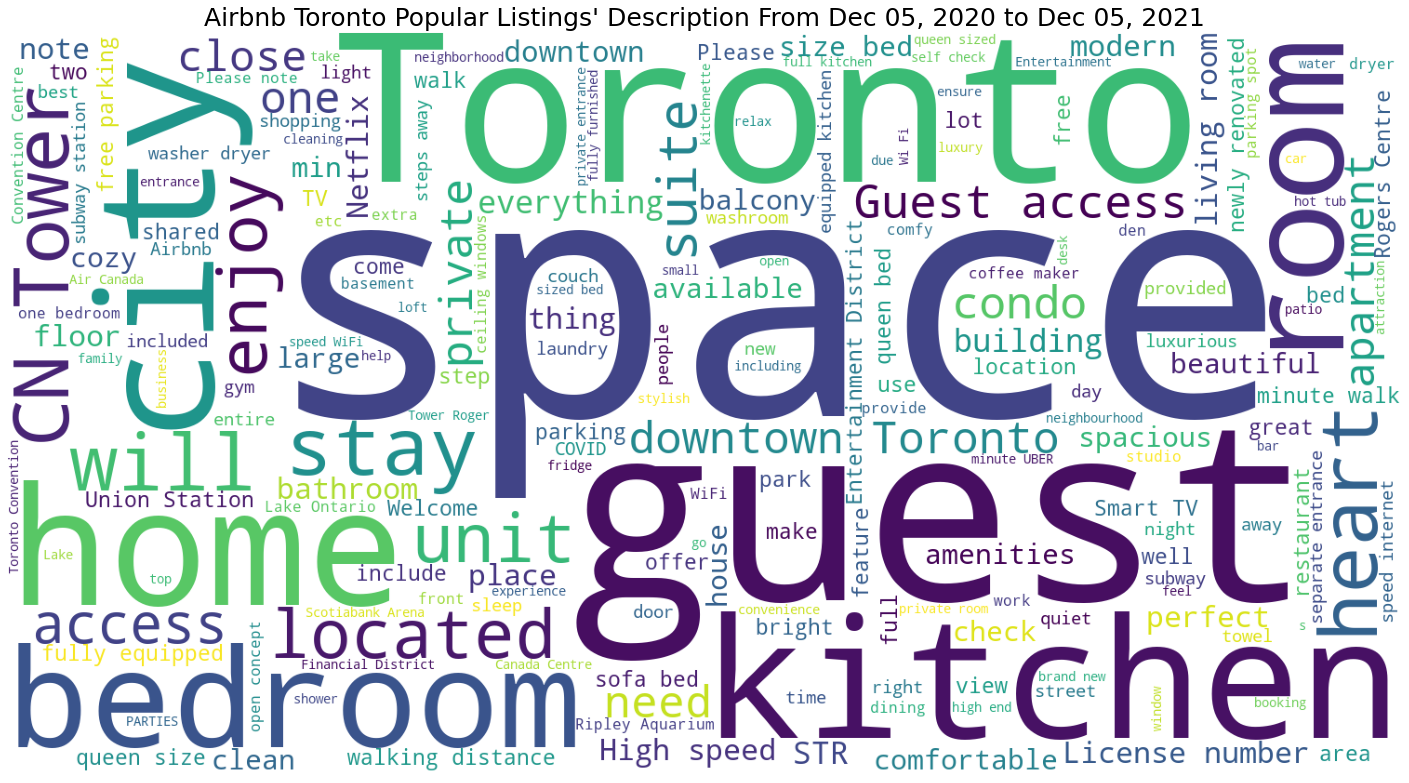

In [62]:
plt.subplots(figsize=(25,15))
STOPWORDS.add('<br />')
STOPWORDS.add('<br>')
STOPWORDS.add('br')
STOPWORDS.add('b')
wordcloud = WordCloud(
                          background_color='white',
                          width=1500,
                          height=800
                         ).generate(" ".join(df_reviews_top.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Airbnb Toronto Popular Listings' Description From Dec 05, 2020 to Dec 05, 2021",size = 25)
plt.show()

# Downtown Toronto

In [32]:
df_DT = df_listings[((df_listings['latitude'] < 43.677110) &
                     (df_listings['latitude'] > 43.633171) &
                     (df_listings['longitude'] > -79.412508) &
                     (df_listings['longitude'] < -79.346120))]
df_DT = df_DT[df_DT["neighbourhood_cleansed"] != "Playter Estates-Danforth"]
df_DT = df_DT[df_DT["neighbourhood_cleansed"] != "Casa Loma"]

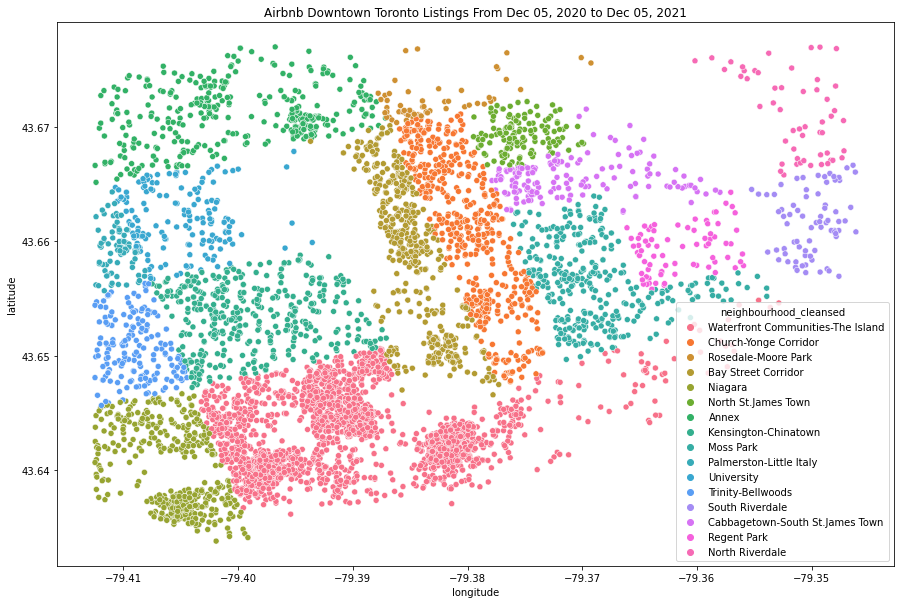

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(df_DT.longitude,df_DT.latitude,hue=df_DT.neighbourhood_cleansed)
plt.title('Airbnb Downtown Toronto Listings From Dec 05, 2020 to Dec 05, 2021')
plt.ioff()

In [34]:
len(df_DT)/len(df_listings) 

0.40771678599840894

Text(0.5, 1.0, 'Airbnb Toronto Downtown Listings Represents 41% of Toronto Listings From Dec 05, 2020 to Dec 05, 2021')

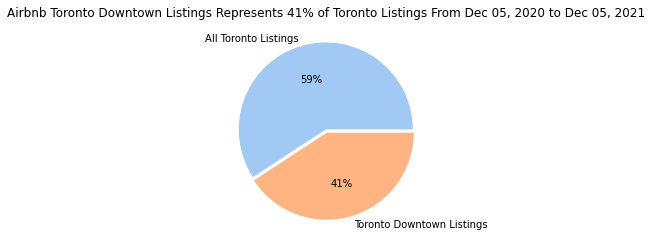

In [35]:
# Downtown Toronto listing is around 41% of total listings in Toronto
df_len = pd.DataFrame()
df_len["Total listings"] = [len(df_listings)-len(df_DT),len(df_DT)]
df_len["Dataframe"] = ["All Toronto Listings","Toronto Downtown Listings" ]
colors = sns.color_palette('pastel')[0:2]
explode = [0.02,0.02]
plt.pie(df_len['Total listings'], labels = df_len["Dataframe"] , colors = colors, autopct='%.0f%%',explode = explode)
plt.title("Airbnb Toronto Downtown Listings Represents 41% of Toronto Listings From Dec 05, 2020 to Dec 05, 2021")


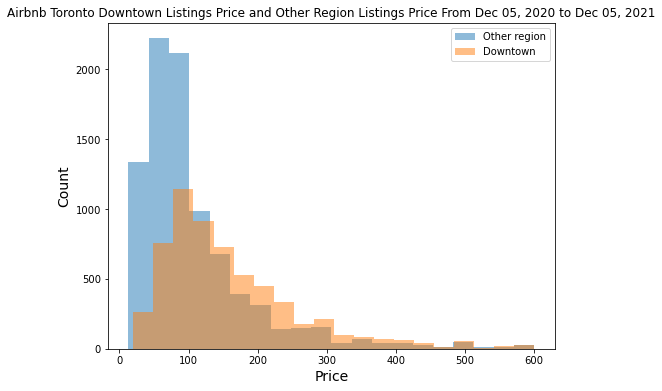

In [57]:
# Price DT vs Price others
df_other_thanDT = df_listings.merge(df_DT.drop_duplicates(), on=['latitude','longitude'], 
                   how='left', indicator=True)
df_other_thanDT = df_other_thanDT[df_other_thanDT['_merge'] == 'left_only']

plt.figure(figsize=(8,6))
plt.hist(df_other_thanDT.price_x[(df_other_thanDT.price_x <= 600) & (df_other_thanDT.price_x > 0)], bins=20, alpha=0.5, label="Other region")
plt.hist(df_DT.price[(df_DT.price <= 600) & (df_DT.price > 0)], bins=20, alpha=0.5, label="Downtown")

plt.xlabel("Price", size=14)
plt.ylabel("Count", size=14)
plt.title("Airbnb Toronto Downtown Listings Price and Other Region Listings Price From Dec 05, 2020 to Dec 05, 2021")
plt.legend(loc='upper right')

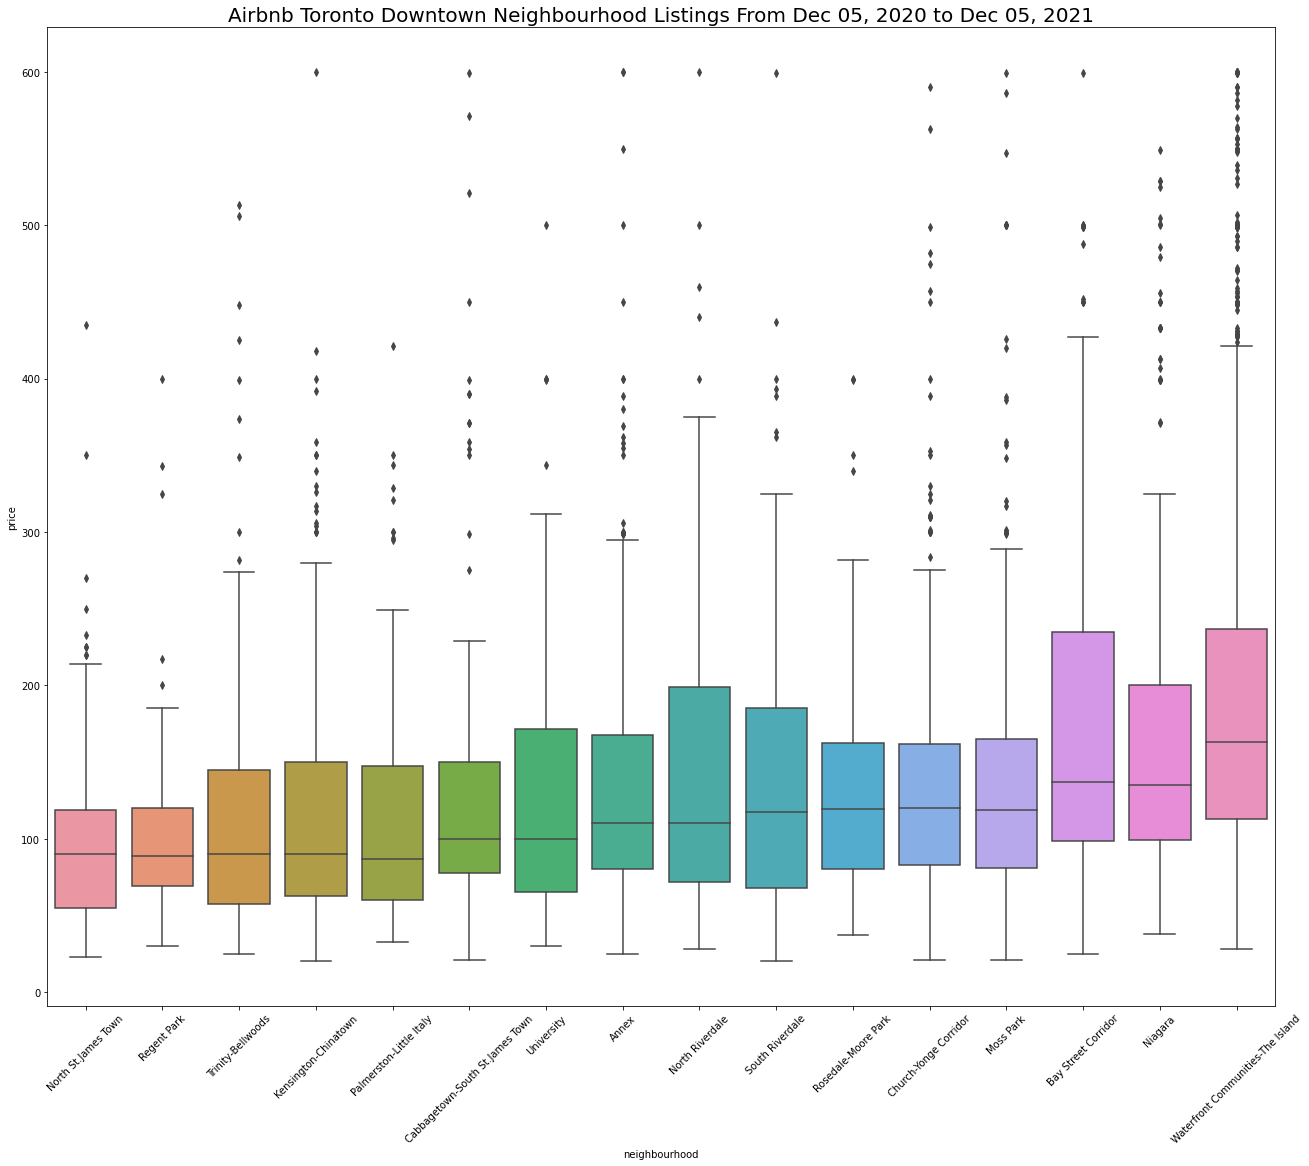

In [60]:
# DT price and nieghbourhood
plt.figure(figsize=(22,18))
plt.xticks(rotation=45)
sort_price = df_DT.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=True).index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=df_DT.loc[(df_DT.price <= 600) & (df_DT.price > 0)], order=sort_price)
plt.title('Airbnb Toronto Downtown Neighbourhood Listings From Dec 05, 2020 to Dec 05, 2021', size = 20)
plt.xlabel('neighbourhood')
plt.savefig('price and DT')